# Notebook to display the heatmaps

After running the strand_soup algorithm with the folowing commands in the terminal previously placed in the directory code/c++: 
- make strand_soup
- ./strand_soup.exe

You should have 3 .csv tables corresponding to the base pair repartition. 
You can see, for every couple of triplets, the repartition of base pairs (internal, homogeneous,heterogeneous).
- internal corresponds to base pairs formed within one strand
- homogeneous is the case of a pair involving 2 strands but of the same type (same triplet repeat).
- heterogeneous is the case of a pair involving 2 strands of different types (different triplet repeats).

In [5]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Load the data from CSV files
# The CSV files should be in the same directory as this script
# You can change the file names as needed
internal_data = pd.read_csv('internal_n=6_m=2.csv', index_col=0)
homogeneous_data = pd.read_csv('homogeneous_n=6_m=2.csv', index_col=0)
heterogeneous_data = pd.read_csv('heterogeneous_n=6_m=2.csv', index_col=0)

In [7]:
# Here we are reordering the rows and columns of the dataframes to match the order of the figure 13 of the paper
custom_order = [
    "UUU", "UCU", "UCC", "CCU", "CUC", "CUU", "UUC", "GGG", "GAG", "AGG", "GGA", "GAA", "AAG", "AGA",
    "CCA", "ACC", "CAC", "CAA", "AAC", "ACA", "AAA", "CCC", "ACG", "CGA", "GAC", "CAG", "AGC", "GCA",
    "GUG", "GGU", "UGG", "GCG", "CGG", "GGC", "AGU", "GUA", "UAG", "AAU", "AUA", "UAA", "GAU", "AUG",
    "UGA", "CAU", "AUC", "UCA", "UAC", "ACU", "CUA", "UGU", "GUU", "UUG", "UAU", "AUU", "UUA", "GUC",
    "CGU", "UCG", "UGC", "CUG", "GCU", "CGC", "CCG", "GCC"
]

internal_data = internal_data.loc[custom_order, custom_order]
homogeneous_data = homogeneous_data.loc[custom_order, custom_order]
heterogeneous_data = heterogeneous_data.loc[custom_order, custom_order]

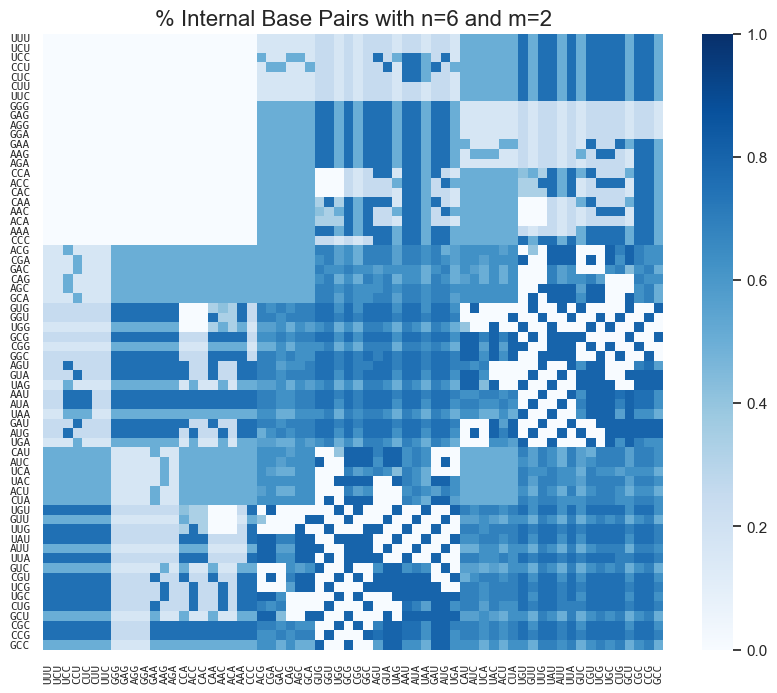

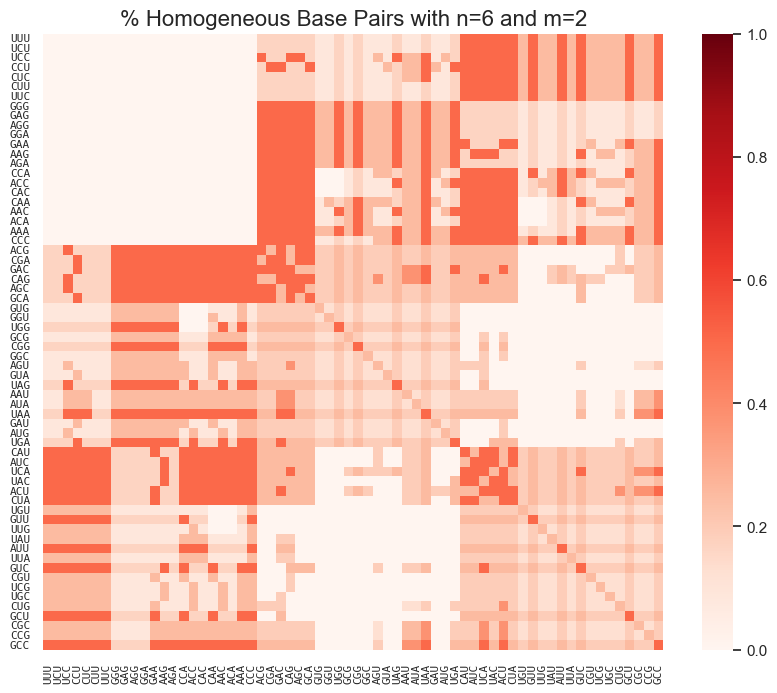

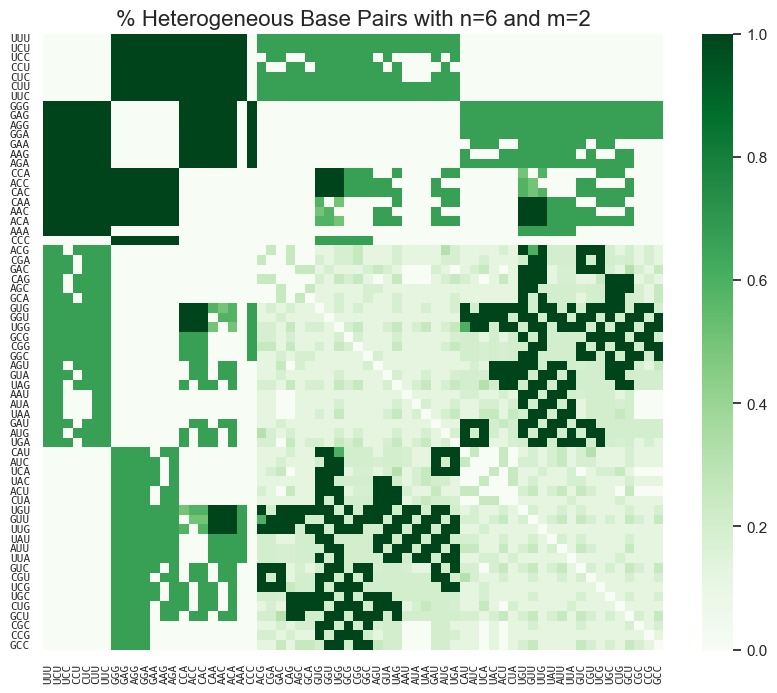

In [9]:
# Set up the heatmap style
sns.set_theme(style="whitegrid")

# Function to plot a heatmap
def plot_heatmap(data, title, cmap="YlGnBu", label_font_size=8):
    plt.figure(figsize=(10, 8))
    sns.heatmap(data,
                annot=False,
                cmap=cmap,
                cbar=True,
                vmin=0,
                vmax=1,
                xticklabels=data.columns,
                yticklabels=data.index)
    plt.title(title, fontsize=16)
    plt.xticks(fontsize=label_font_size, rotation=90, fontfamily='monospace')
    plt.yticks(fontsize=label_font_size, fontfamily='monospace')
    plt.show()

# Plot the heatmap for internal base pairing
plot_heatmap(internal_data, "% Internal Base Pairs with n=6 and m=2", cmap="Blues")

# Plot the heatmap for homogeneous base pairing
plot_heatmap(homogeneous_data, "% Homogeneous Base Pairs with n=6 and m=2", cmap="Reds")

# Plot the heatmap for heterogeneous base pairing
plot_heatmap(heterogeneous_data, "% Heterogeneous Base Pairs with n=6 and m=2", cmap="Greens")

Overall we can see a similar patern as the one from the figure 13. However, we still have some strange behaviour and results especially the lines in internal and homogenous. Indeed, we could expect GCC and CCG to have similar repartitions for internal and homogeneous but it isn't the case here. This must be due to our incomplete backtrack. Indeed, we only backtrack one secondary structure from each starting points. However, multiple structures can lead to the same starting point. By selecting one, we break this "symmetry" which induces these strange lines. 

We could solve this by backtracking every case. The results would be much better ! 
However the question of the computation time might become a big problem.

The matrix can also be changed with the choice of the energy model. Indeed, here we have the simplistic base pair maximization model. But just adding coefficient to different pairs (G-C = -3, A-U = -2, G-U = -1) would change some parts of the matrix.